## ----------------------------------------- Telecom Churn Case Study -----------------------------------------------

#### Business Problem
*In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.*<br>

*For many incumbent operators, retaining high profitable customers is the number one business goal.*<br>
*To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.*<br>

**Business Objective**<br>
*The business objective is to predict the churn using the data (features) from the first three months. To do this task well, it will be helpful to understand the typical customer behaviour during churn.*

*Identify important variables that are strong predictors of churn.*

##### Importing necessary Libraries

In [208]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter#
import re
import os

import imblearn 
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.dummy import DummyClassifier#
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix


from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

# supressing warnings
import warnings
warnings.filterwarnings('ignore')

#### Reading and understanding data

In [209]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [211]:
df_telecom= pd.read_csv("train.csv")
pd.set_option('max_columns', None)
df_telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [47]:
df_telecom.shape

(69999, 172)

In [48]:
df_telecom.info(verbose =True)
# for some reason all the columns were not listed. It may be due to large numbe of columns( found the solution below)
#https://stackoverflow.com/questions/43427564/display-all-informations-with-data-info-in-python

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [49]:
# Checking numerical columns stats
df_telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

#### Data Cleaning

In [50]:
# Creating function to check the % of missing values, greater than a certain percent.
# Creating funtion here since we are gonna use this multiple times. The function accepts the dataset and the percent to filter
def missingData(data,percent):
    # data is the dataframe, percent is the value to filter the missing vaues greater than it
    missingData = round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False)[round(100*(df_telecom.isnull().sum()/len(df_telecom.index)),2) >percent]
    print (missingData.head(50))

In [51]:
missingData(df_telecom,70)

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

*Seems too much of missing data*<br>

*Drop columns where missing percentage is >70*<br>

In [52]:
#Making list of recharge columns to look for any pattern
recharge_columns_count=df_telecom.columns[df_telecom.columns.to_series().str.contains('count_rech')]
recharge_columns_total=df_telecom.columns[df_telecom.columns.to_series().str.contains('total_rech_data')]
recharge_columns_max=df_telecom.columns[df_telecom.columns.to_series().str.contains('max_rech_data')]
recharge_columns_avg=df_telecom.columns[df_telecom.columns.to_series().str.contains('av_rech')]

In [53]:
print(df_telecom[recharge_columns_count].shape)
print(df_telecom[recharge_columns_total].shape)
print(df_telecom[recharge_columns_max].shape)
print(df_telecom[recharge_columns_avg].shape)

(69999, 6)
(69999, 3)
(69999, 3)
(69999, 3)


In [54]:
df_telecom[recharge_columns_count]

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,6.0,6.0,0.0,1.0,0.0
...,...,...,...,...,...,...
69994,NaN,6.0,1.0,NaN,1.0,0.0
69995,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN
69997,0.0,0.0,0.0,1.0,1.0,1.0


In [55]:
df_telecom[recharge_columns_total]

,total_rech_data_6,total_rech_data_7,total_rech_data_8
0,NaN,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,7.0,7.0,6.0
...,...,...,...
69994,NaN,7.0,1.0
69995,NaN,NaN,NaN
69996,NaN,NaN,NaN
69997,1.0,1.0,1.0


In [56]:
df_telecom[recharge_columns_max]

,max_rech_data_6,max_rech_data_7,max_rech_data_8
0,NaN,NaN,NaN
1,NaN,145.0,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,25.0,41.0,25.0
...,...,...,...
69994,NaN,25.0,17.0
69995,NaN,NaN,NaN
69996,NaN,NaN,NaN
69997,179.0,252.0,145.0


In [57]:
df_telecom[recharge_columns_avg]

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0,NaN,NaN,NaN
1,NaN,145.0,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,175.0,191.0,142.0
...,...,...,...
69994,NaN,135.0,17.0
69995,NaN,NaN,NaN
69996,NaN,NaN,NaN
69997,179.0,252.0,145.0


In [58]:
# The above recharge columns can be imputed with zero since missing value would mean customer did not recharge
df_telecom[recharge_columns_avg]=df_telecom[recharge_columns_avg].fillna(0)
df_telecom[recharge_columns_max]=df_telecom[recharge_columns_max].fillna(0)
df_telecom[recharge_columns_total]=df_telecom[recharge_columns_total].fillna(0)
df_telecom[recharge_columns_count]=df_telecom[recharge_columns_count].fillna(0)

In [59]:
#Verifying the result of imputation
print('Verifying imputed avg_rech columns \n')
print(missingData(df_telecom[recharge_columns_avg],60))
print('Verifying imputed avg_max columns \n')
print(missingData(df_telecom[recharge_columns_max],60))
print('Verifying imputed avg_total columns \n')
print(missingData(df_telecom[recharge_columns_total],60))
print('Verifying imputed avg_count columns \n')
print(missingData(df_telecom[recharge_columns_count],60))

Verifying imputed avg_rech columns 

Series([], dtype: float64)
None
Verifying imputed avg_max columns 

Series([], dtype: float64)
None
Verifying imputed avg_total columns 

Series([], dtype: float64)
None
Verifying imputed avg_count columns 

Series([], dtype: float64)
None


*No more missing values for imputed columns*<br>

In [60]:
missingData(df_telecom,70)

night_pck_user_6            74.90
arpu_3g_6                   74.90
fb_user_6                   74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
fb_user_7                   74.48
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
arpu_2g_7                   74.48
arpu_3g_7                   74.48
date_of_last_rech_data_8    73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
night_pck_user_8            73.69
fb_user_8                   73.69
dtype: float64


##### Looking at the above set of data it looks like the customer has not recharged the phone for the 6th, 7th, 8th and 9th month. Hence the date of last recharge is NULL and hence the night pack usage, 2g and 3g  are also NULL. All these parameters contribute to NULL average revenue per user (ARPU). Hence imputing these columns with zeroes.

In [61]:
# Checking once again which all columns have missing data more than 50 percent
missingData(df_telecom,50)

night_pck_user_6            74.90
arpu_3g_6                   74.90
fb_user_6                   74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
fb_user_7                   74.48
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
arpu_2g_7                   74.48
arpu_3g_7                   74.48
date_of_last_rech_data_8    73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
night_pck_user_8            73.69
fb_user_8                   73.69
dtype: float64


In [62]:
#Creating list of columns to impute with 0, based on business understanding
lst=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
     'night_pck_user_6','night_pck_user_7', 'night_pck_user_8',
     'fb_user_6','fb_user_7','fb_user_8',
     'arpu_2g_6','arpu_3g_6','arpu_2g_7','arpu_3g_7','arpu_2g_8','arpu_3g_8',
     'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'
    ]

df_telecom[lst]=df_telecom[lst].fillna(0)
df_telecom[lst]

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,arpu_2g_6,arpu_3g_6,arpu_2g_7,arpu_3g_7,arpu_2g_8,arpu_3g_8,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
1,0,7/8/2014,0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,122.08,122.07,0.00,0.00,0.0,0.0,0.0
2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
4,6/25/2014,7/23/2014,8/20/2014,0.0,0.0,0.0,1.0,1.0,1.0,0.00,0.00,35.12,35.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0,7/31/2014,8/21/2014,0.0,0.0,0.0,0.0,1.0,1.0,0.00,0.00,60.61,21.91,48.00,0.00,0.0,0.0,0.0
69995,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
69996,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
69997,6/17/2014,7/13/2014,8/14/2014,0.0,0.0,0.0,1.0,1.0,1.0,150.67,150.67,212.17,212.18,122.07,122.08,0.0,0.0,0.0


In [63]:
# df_telecom[lst]
# np.any(np.isnan(df_telecom))
df_telecom

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0,7/8/2014,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.

In [64]:
missingData(df_telecom,1)

roam_og_mou_8       5.29
spl_og_mou_8        5.29
og_others_8         5.29
loc_ic_t2t_mou_8    5.29
loc_og_t2m_mou_8    5.29
loc_og_t2c_mou_8    5.29
loc_ic_t2m_mou_8    5.29
loc_og_t2t_mou_8    5.29
loc_ic_t2f_mou_8    5.29
std_og_t2f_mou_8    5.29
isd_og_mou_8        5.29
loc_ic_mou_8        5.29
roam_ic_mou_8       5.29
loc_og_mou_8        5.29
std_ic_t2t_mou_8    5.29
offnet_mou_8        5.29
std_ic_t2m_mou_8    5.29
onnet_mou_8         5.29
std_og_mou_8        5.29
std_ic_t2f_mou_8    5.29
std_ic_t2o_mou_8    5.29
std_og_t2t_mou_8    5.29
std_ic_mou_8        5.29
spl_ic_mou_8        5.29
std_og_t2c_mou_8    5.29
isd_ic_mou_8        5.29
std_og_t2m_mou_8    5.29
ic_others_8         5.29
loc_og_t2f_mou_8    5.29
isd_og_mou_6        3.95
spl_og_mou_6        3.95
std_og_mou_6        3.95
std_ic_t2o_mou_6    3.95
og_others_6         3.95
loc_ic_t2m_mou_6    3.95
loc_ic_t2f_mou_6    3.95
loc_ic_mou_6        3.95
std_ic_t2t_mou_6    3.95
std_ic_t2m_mou_6    3.95
std_ic_t2f_mou_6    3.95


In [65]:
# Checking how python takes care of non-date datatypes in datetype column
print(df_telecom.date_of_last_rech_data_6.dtypes)
print(df_telecom.date_of_last_rech_data_7.dtypes)
print(df_telecom.date_of_last_rech_data_8.dtypes)


object
object
object


In [66]:
# Converting the datatype for date columns to date columns rather than object
date_columns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'
            ]
df_telecom[date_columns]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,0,0,0
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,0,7/8/2014,0
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,0,0,0
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,0,0,0
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,0,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,0,0,0
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,0,0,0
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [67]:
# Function to convert datatype of non-date columns to datetime
def ConverttoDate(colnames,data):
    for col in colnames:
        data[col] = pd.to_datetime(data[col])

In [68]:
# Function call to convert to date datatype
ConverttoDate(date_columns,df_telecom)

In [69]:
# Checking how the values look now
df_telecom[date_columns].dtypes

last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
dtype: object

In [70]:
missingData(df_telecom,1)

roam_og_mou_8       5.29
spl_og_mou_8        5.29
og_others_8         5.29
loc_ic_t2t_mou_8    5.29
loc_og_t2m_mou_8    5.29
loc_og_t2c_mou_8    5.29
loc_ic_t2m_mou_8    5.29
loc_og_t2t_mou_8    5.29
loc_ic_t2f_mou_8    5.29
std_og_t2f_mou_8    5.29
isd_og_mou_8        5.29
loc_ic_mou_8        5.29
roam_ic_mou_8       5.29
loc_og_mou_8        5.29
std_ic_t2t_mou_8    5.29
offnet_mou_8        5.29
std_ic_t2m_mou_8    5.29
onnet_mou_8         5.29
std_og_mou_8        5.29
std_ic_t2f_mou_8    5.29
std_ic_t2o_mou_8    5.29
std_og_t2t_mou_8    5.29
std_ic_mou_8        5.29
spl_ic_mou_8        5.29
std_og_t2c_mou_8    5.29
isd_ic_mou_8        5.29
std_og_t2m_mou_8    5.29
ic_others_8         5.29
loc_og_t2f_mou_8    5.29
isd_og_mou_6        3.95
spl_og_mou_6        3.95
std_og_mou_6        3.95
std_ic_t2o_mou_6    3.95
og_others_6         3.95
loc_ic_t2m_mou_6    3.95
loc_ic_t2f_mou_6    3.95
loc_ic_mou_6        3.95
std_ic_t2t_mou_6    3.95
std_ic_t2m_mou_6    3.95
std_ic_t2f_mou_6    3.95


#### New features: Calculate average recharge amounts in 6th and 7th month

In [71]:
# Calcualte average recharge amounts in months 6 and 7
df_telecom['rech_amt_6'] = df_telecom.total_rech_amt_6+df_telecom.total_rech_data_6*df_telecom.av_rech_amt_data_6
df_telecom['rech_amt_7'] = df_telecom.total_rech_amt_7+df_telecom.total_rech_data_7*df_telecom.av_rech_amt_data_7
df_telecom['rech_amt_8'] = df_telecom.total_rech_amt_8+df_telecom.total_rech_data_8*df_telecom.av_rech_amt_data_8
df_telecom['avg_rech_amt_67']=(df_telecom['rech_amt_6']+df_telecom['rech_amt_7'])/2

# checking shape of the dataframe
df_telecom.shape

(69999, 176)

In [72]:
df_telecom['avg_rech_amt_67'].sort_values(ascending=False)

36595    37762.5
28881    34103.0
40816    32593.5
31373    29185.5
19030    27414.0
          ...   
31592        0.0
15487        0.0
31604        0.0
44012        0.0
34999        0.0
Name: avg_rech_amt_67, Length: 69999, dtype: float64

In [73]:
df_telecom = df_telecom.apply (pd.to_numeric, errors='coerce')
df_telecom.fillna(0, inplace=True)
df_telecom = df_telecom.replace('NaN', np.nan).fillna(0)
missingData(df_telecom,0)

Series([], dtype: float64)


#### Identifying High value customers

In [74]:
# High value customers are the customers whose avg recharge amount is greater than or equal to 70 percentile in a month
high_val_cust_thres=df_telecom.avg_rech_amt_67.quantile(0.70)

# Filtering high value customers to a new dataframe
hv_df_telecom=df_telecom[df_telecom.avg_rech_amt_67>=high_val_cust_thres]

In [75]:
hv_df_telecom.shape

(21013, 176)

*Since high value customers have now been filtered , the newly created columns can now be dropped*<br>

In [76]:
hv_df_telecom = hv_df_telecom.drop(['rech_amt_6', 'rech_amt_7','rech_amt_8', 'avg_rech_amt_67'], axis=1)
hv_df_telecom.shape

(21013, 172)

#### This means we have 30001 customers who have recharged ( spent money ) greater than or equal to the recharge value of the 70th percentile

In [77]:
hv_df_telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,21013.00000,21013.0,21013.0,21013.0,21013.0,2.101300e+04,2.101300e+04,2.101300e+04,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,2.101300e+04,2.101300e+0

In [78]:
hv_df_telecom.shape

(21013, 172)

#### Identifying the percentage of churing probability

In [79]:
hv_df_telecom['churn_probability'].value_counts()/len(hv_df_telecom)*100

0    91.724171
1     8.275829
Name: churn_probability, dtype: float64

#### 91% of customers do not churn, it could be a scenario for class imbalance

In [80]:
# Remove columns for 9th month (To be removed)
churn_cols = [col for col in hv_df_telecom.columns if '_9' in col]
#hv_df_telecom[churn_cols]
hv_df_telecom=hv_df_telecom.drop(churn_cols,axis=1)

# checking shape of the dataframe
hv_df_telecom.shape

(21013, 172)

*Some of the columns have no effect on our anlaysis, hence dropping them*<br>

In [81]:
# Dropping below columns will have no impact on prediction, hence dropping them

noeffect = ['mobile_number','circle_id',
   'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
   'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
hv_df_telecom = hv_df_telecom.drop(noeffect, axis=1, errors='ignore')


hv_df_telecom.shape

(21013, 162)

In [82]:
hv_df_telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013 entries, 4 to 69997
Data columns (total 162 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   

<AxesSubplot:ylabel='arpu_6'>

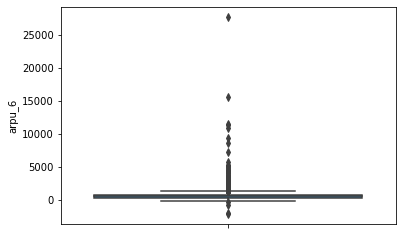

In [83]:
sns.boxplot(y="arpu_6",data=hv_df_telecom)

*Rather than making plots for each individual columns, creating a function to do so in one go. Also it seems there are some unexpected negative values in 'arpu_6' column. There could be more such columns, and they can be identified by plotting the boxplot*<br>

In [84]:
def outlier_cols(data,outlier_type=-1):
    colsWithOutliers = []
    for col in data.columns:
        if (outlier_type<0 and data[col].min()<0) :
            colsWithOutliers.append(col)
        elif (outlier_type>0 and data[col].max()>data[col].std()*4):
            if data[col].max()>50:
                colsWithOutliers.append(col)
    return (colsWithOutliers)


In [85]:
def plot_outliers(colsWithOutliers):
# Function to Plot the outliers
    data=hv_df_telecom
    imax=int(round(len(colsWithOutliers)/4+0.4,0))
    if imax<=0: 
        print('No remaining outliers')
        return
    fig, axes = plt.subplots(imax,4, figsize=(20,imax*6))
    #fig.suptitle('Outliers Boxplots')
    i=0
    j=0
    for col in colsWithOutliers:
        if imax==1: sns.boxplot(ax=axes[i], y=colsWithOutliers, data=data)
        else:sns.boxplot(ax=axes[i,j], y=col, data=data)
        j=j+1
        if j==4: 
            i=i+1
            j=0
    plt.show()

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


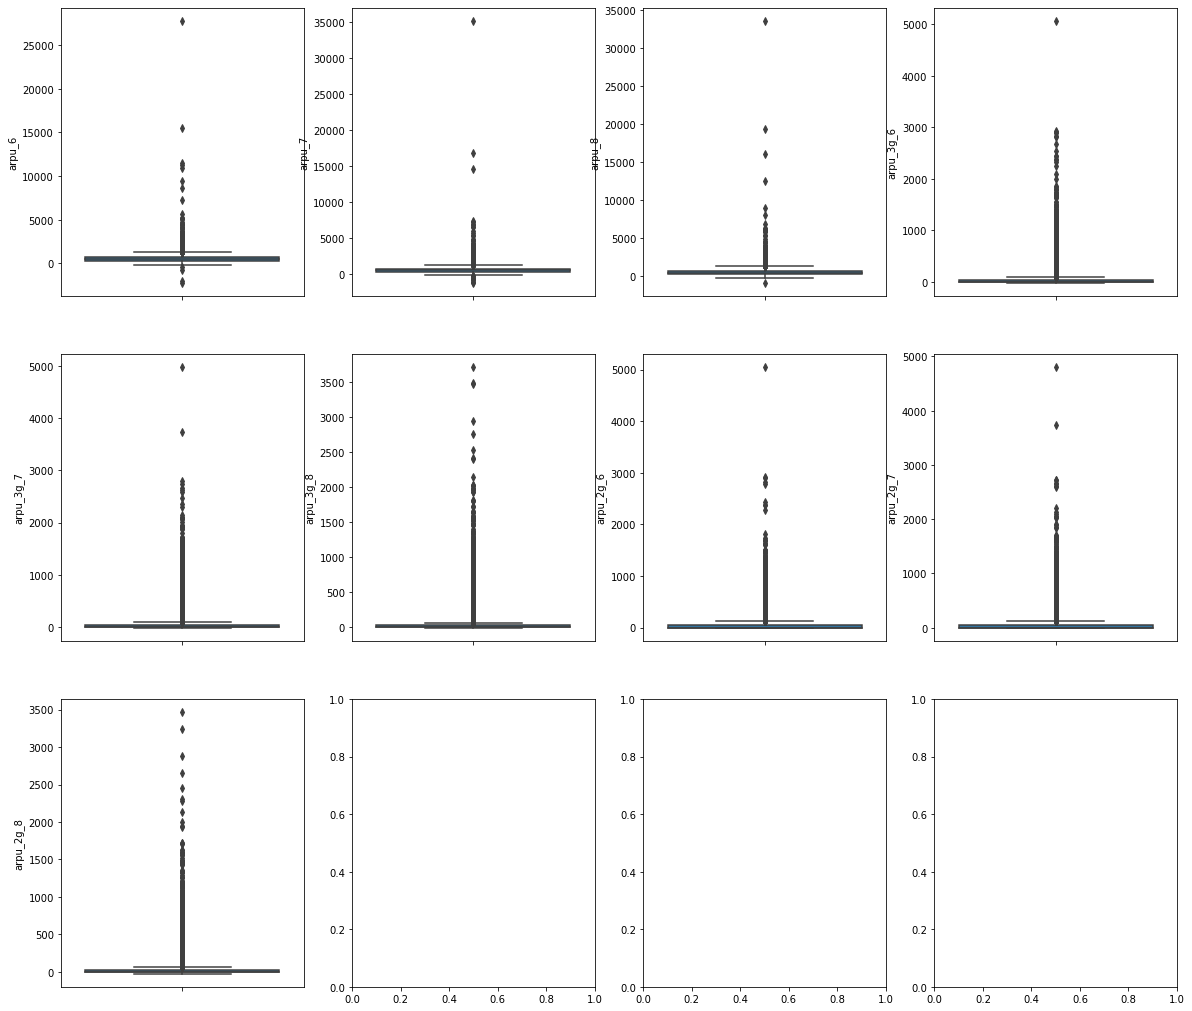

In [86]:
# Negative outlier values
neg_outliers=outlier_cols(hv_df_telecom,-1)
print(neg_outliers)
# Plot negative outliers
plot_outliers(neg_outliers)

*There are 9 columns with negative values. These columns cannot be negative, they should be either 0 or greater than 0. Imputing the above columns with 0*<br>

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


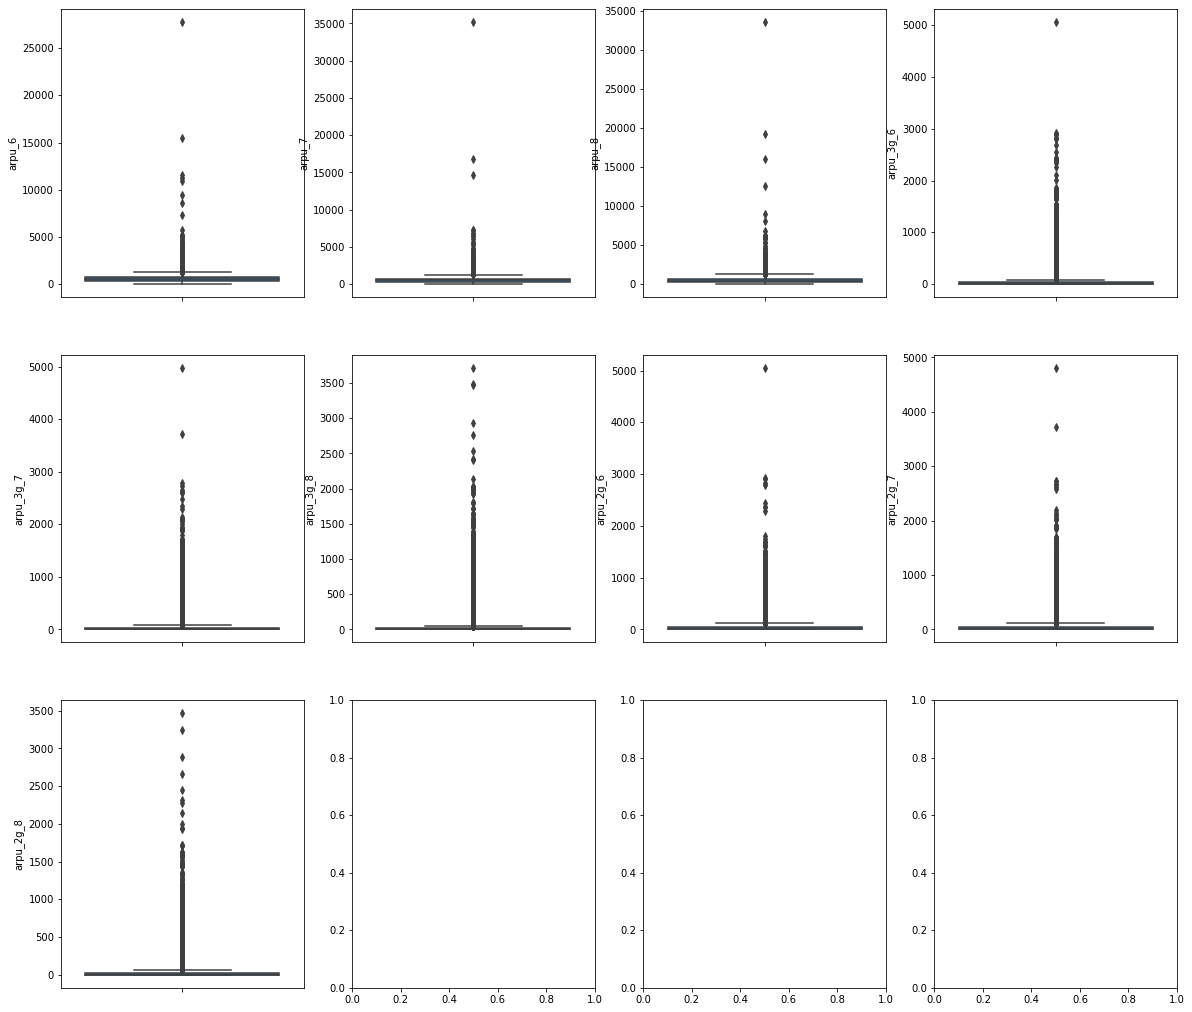

In [87]:
# Replace negative values with zero 
for col in neg_outliers:
        hv_df_telecom[col]=hv_df_telecom[col].apply(lambda x: max(x,0))
print(neg_outliers)
plot_outliers(neg_outliers)

*Negative outliers have been removed*<br>

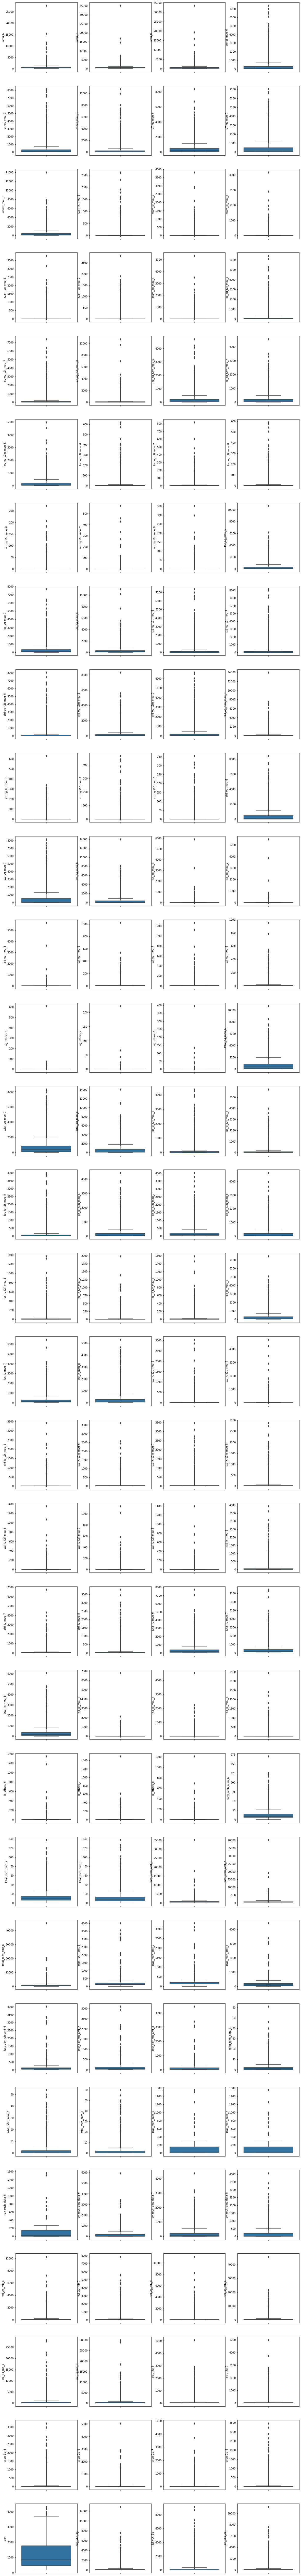

In [89]:
# Remaining outliers
outliers=outlier_cols(hv_df_telecom,1)

# plotting outliers
plot_outliers(outliers)

In [90]:
hv_df_telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
4,4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,1.0,0.0,1.0,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,602,0.0,0.00,0.00,0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,

In [91]:
hv_df_telecom[outliers]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.00,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.00,0.00,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,647,0.00,0.00,0.00
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.00,0.00,0.0,0.00,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.00,0.00,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.26,0.00,0.00,6.26,0.00,0.00,0.00,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.03,0.00,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.00,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,602,0.00,0.00,0.00
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.00,0.00,0.0,0.00,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.00,0.00,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.00,0.00,0.00,202.08,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.0,207.03,0.00,0.00,0.00,0.00,0.00,207.03,0.00,0.00,598.54,448.36,203.29,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,455,0.00,0.00,0.00
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.00,0.0,0.00,0.00,0.0,0.00,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.00,0.00,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,288.31,121.79,0.00,0.00

In [92]:
#Capping the outliers to 95 percentile
cap = hv_df_telecom[outliers].quantile(.95)
print(cap)

arpu_6         1239.5918
arpu_7         1247.4772
arpu_8         1246.2476
onnet_mou_6    1141.5380
onnet_mou_7    1188.3100
                 ...    
arpu_2g_8       325.2460
aon            3123.4000
aug_vbc_3g      926.9520
jul_vbc_3g      966.3540
jun_vbc_3g      886.2360
Name: 0.95, Length: 124, dtype: float64


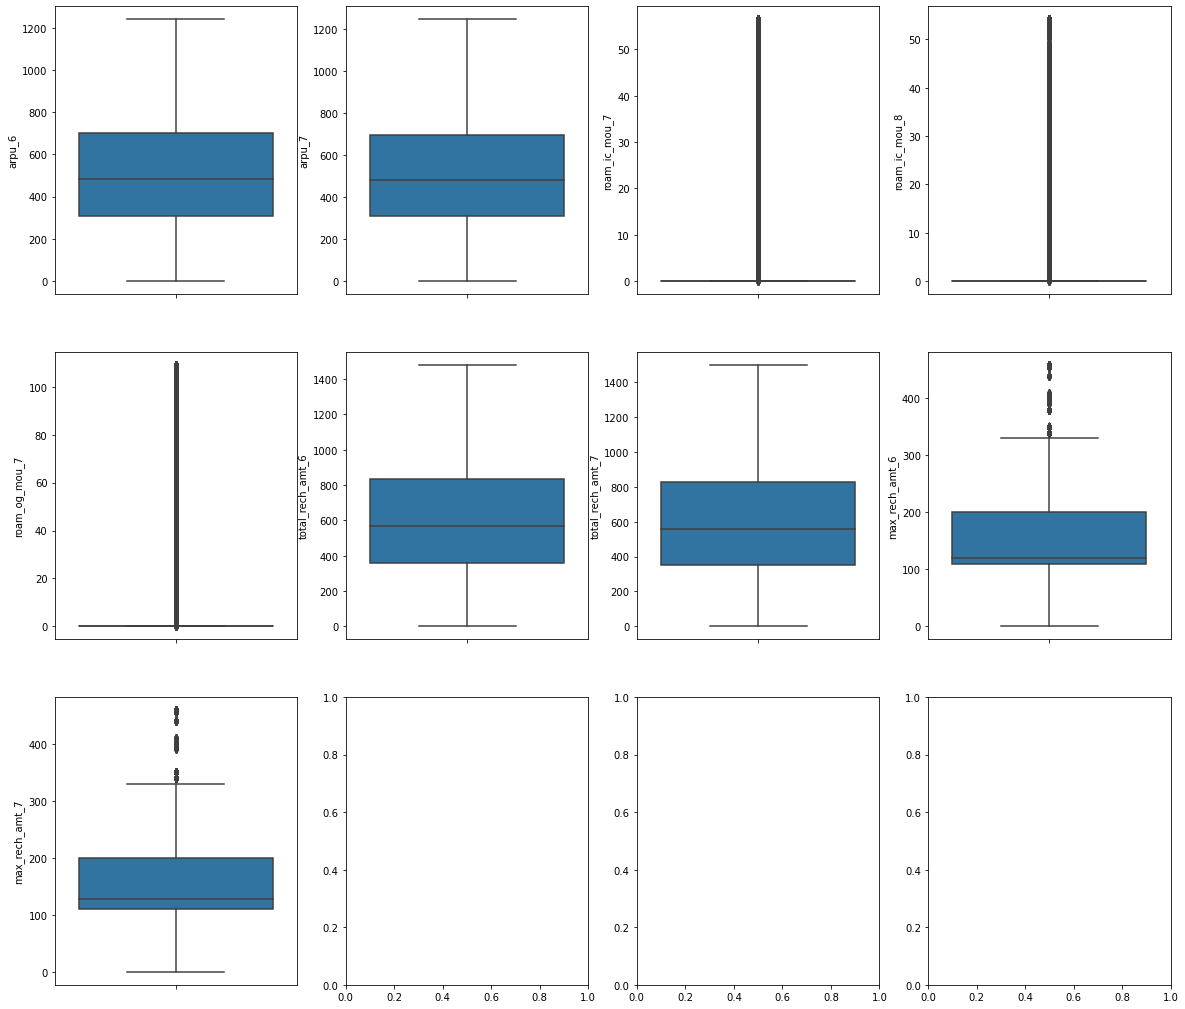

In [93]:
# Capping outliers in the top 5% quantile
for col in outliers:
    cap = hv_df_telecom[col].quantile(.95)
    hv_df_telecom[col]=hv_df_telecom[col].apply(lambda x: min(x,cap))
cols=outlier_cols(hv_df_telecom,+1)

# plot outliers
plot_outliers(cols)    

In [94]:
hv_df_telecom[outliers].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,531.126112,531.017120,478.054328,228.677881,233.052316,198.455991,343.174871,343.750661,301.062433,7.781772,4.753649,4.583043,13.994793,9.373447,8.429512,60.901346,61.265646,56.052654,144.882785,144.883485,134.007811,4.308700,4.392976,4.019353,0.981205,1.135844,1.041309,225.350779,225.474642,207.557530,137.301580,143.144510,116.289960,149.390005,155.100274,125.853209,0.550524,0.515580,0.454522,314.395428,326.516061,268.573850,0.048776,0.040750,0.021428,4.314168,5.294156,4.891532,0.471012,0.0,0.0,573.995992,584.906623,509.253892,50.160043,50.751225,47.750573,133.034028,133.60

In [95]:
# Create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = hv_df_telecom
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_probability",hue="churn_probability",showfliers=False,palette=("Blues"))
    plt.legend(loc='upper right',title='churn_probability')
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_probability",hue="churn_probability",showfliers=False,palette=("Blues"))
    plt.legend(loc='upper right',title='churn_probability')
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_probability",hue="churn_probability",showfliers=False,palette=("Blues"))
    plt.legend(loc='upper right',title='churn_probability')
    plt.show()

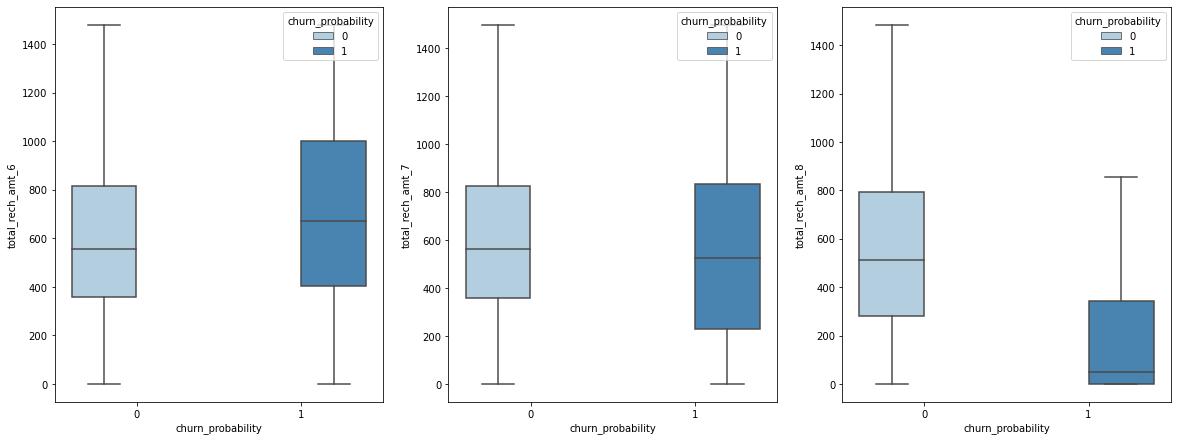

In [96]:
# Making list of recharge columns in high value customers dataframe

hv_recharge_columns =  hv_df_telecom.columns[hv_df_telecom.columns.str.contains('rech_amt')]
hv_recharge_columns.tolist()
plot_box_chart('total_rech_amt')

*It is evident from the above chart that the total recharge amount has dropped significantly in the 8th month for the churned customers*<br>

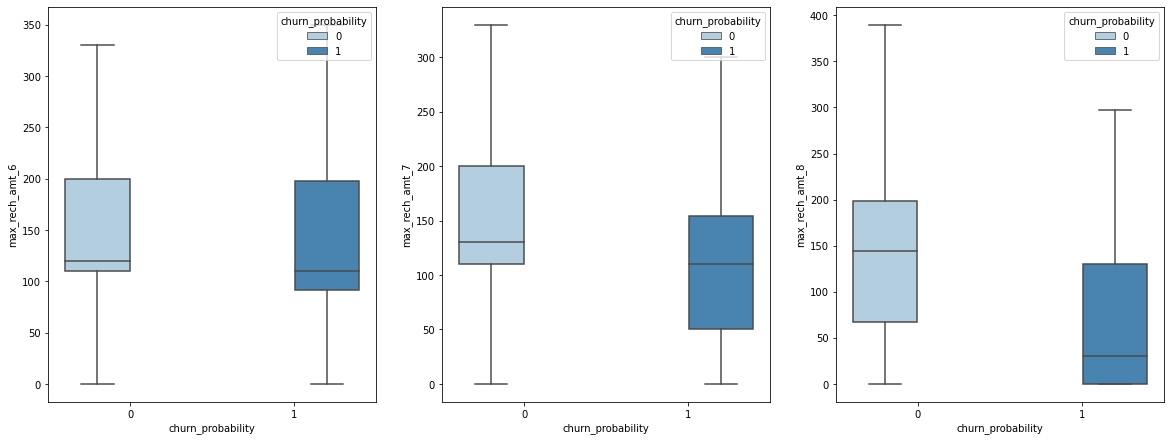

In [97]:
plot_box_chart('max_rech_amt')

*This chart also confirms the same pattern ( drop in maximum recharge amount for the chured customers)*<br>

In [98]:
hv_df_telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
4,4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.830,6.13,36.74,19.88,4.61,11.990,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.660,10.58,4.330,19.49,5.510,3.63,6.140,21.54,9.360,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647.0,0.0,0.00,0.00,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.990,194.43,313.76,330.88,185.88,3.260,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,5.75,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,222.826,219.31,500.598,285.63,0.000,1.93,8.880,233.18,762.844,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,4.0,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,1.0,0.0,1.0,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,602.0,0.0,0.00,0.00,0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91

In [99]:
# Creating function to compare different features for the 3 months
def univariate(col1,col2,col3):
    fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(24,8))
    sns.distplot(col1, ax=axs[0])
    sns.distplot(col2,ax=axs[1])
    sns.distplot(col3, ax=axs[2])

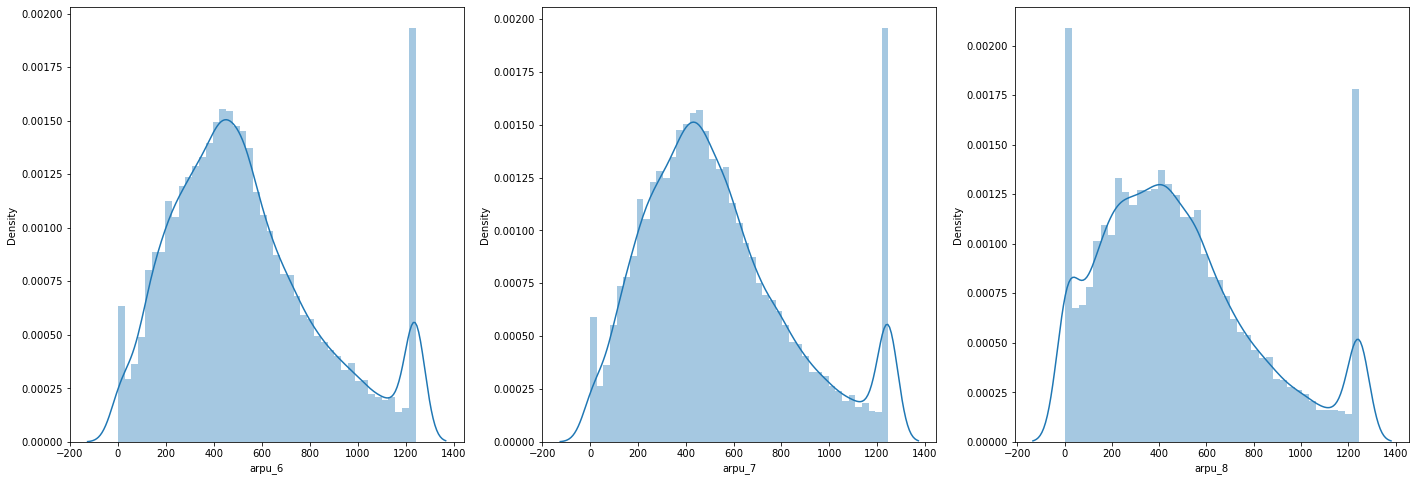

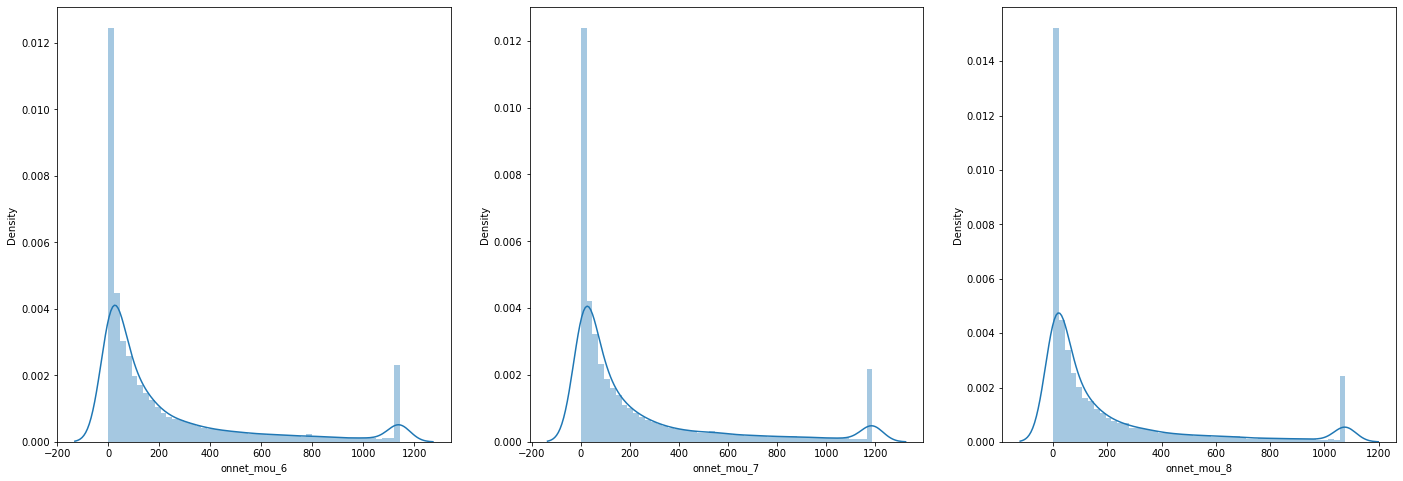

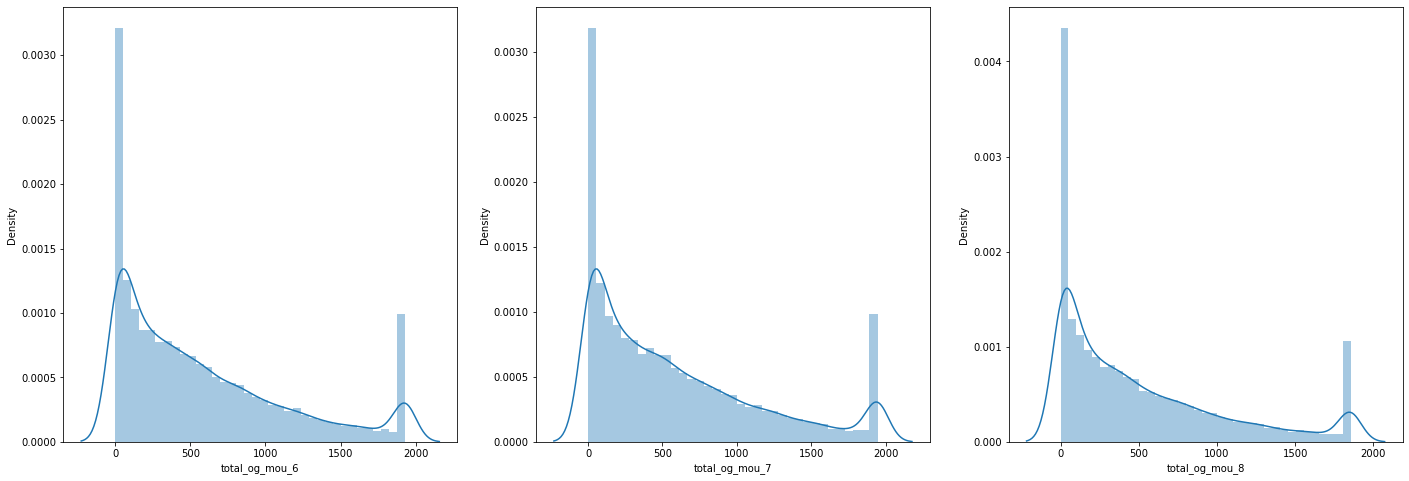

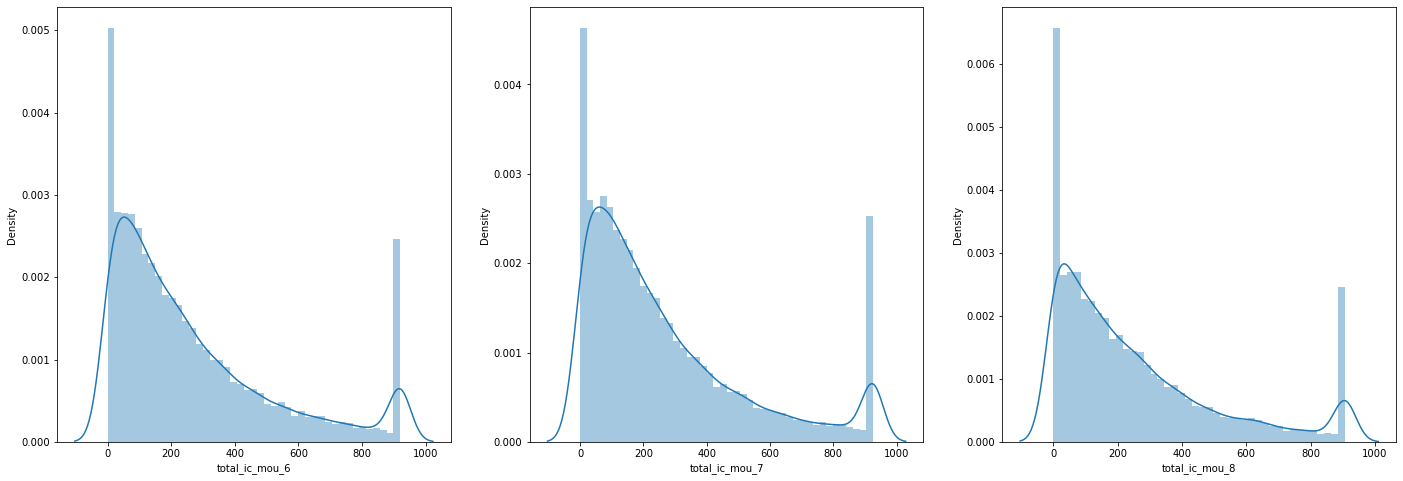

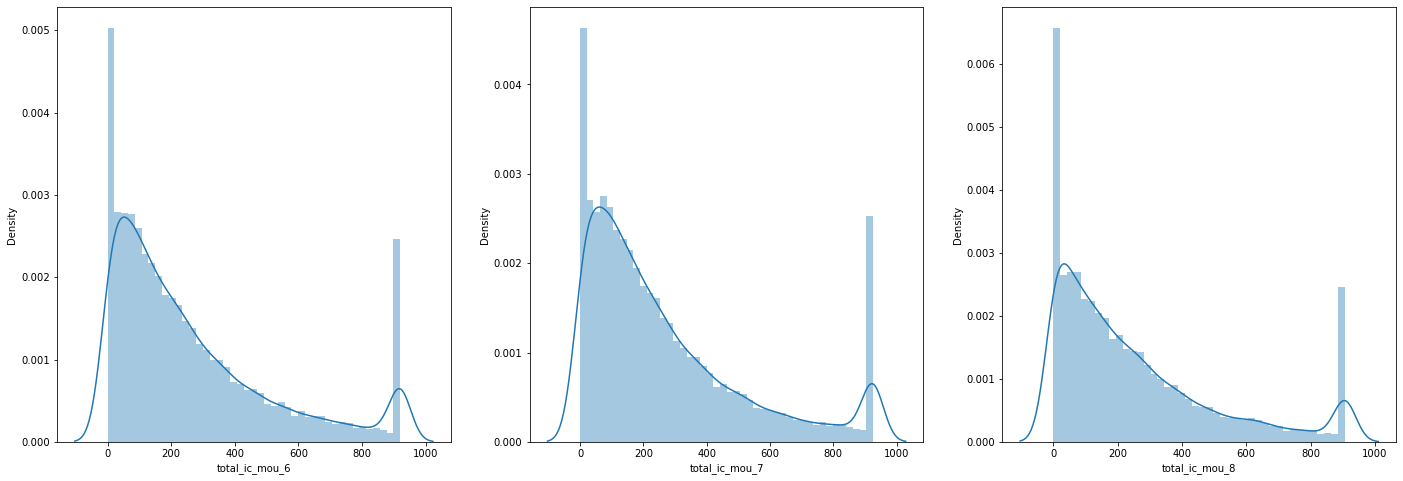

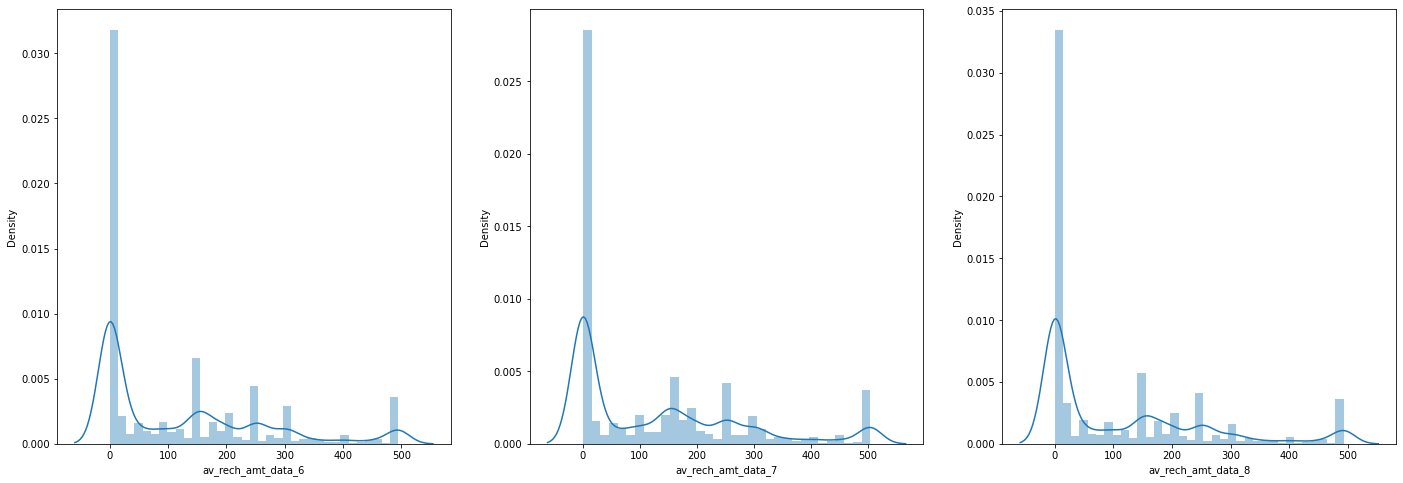

In [100]:
#Comparing the arpu,onnet_mou and some other columns for the months 6,7 & 8
univariate(hv_df_telecom.arpu_6,hv_df_telecom.arpu_7,hv_df_telecom.arpu_8)
univariate(hv_df_telecom.onnet_mou_6,hv_df_telecom.onnet_mou_7,hv_df_telecom.onnet_mou_8)
univariate(hv_df_telecom.total_og_mou_6,hv_df_telecom.total_og_mou_7,hv_df_telecom.total_og_mou_8)
univariate(hv_df_telecom.total_ic_mou_6,hv_df_telecom.total_ic_mou_7,hv_df_telecom.total_ic_mou_8)
univariate(hv_df_telecom.total_ic_mou_6,hv_df_telecom.total_ic_mou_7,hv_df_telecom.total_ic_mou_8)
univariate(hv_df_telecom.av_rech_amt_data_6,hv_df_telecom.av_rech_amt_data_7,hv_df_telecom.av_rech_amt_data_8)  

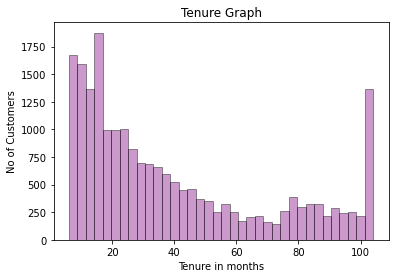

In [101]:
hv_df_telecom['aon_mon'] = hv_df_telecom['aon']/30
hv_df_telecom['aon_mon'].head()

ax = sns.distplot(hv_df_telecom['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
plt.show()

In [102]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
hv_df_telecom['tenure_range'] = pd.cut(hv_df_telecom['aon_mon'], tenure_range, labels=tenure_label)
hv_df_telecom['tenure_range'].head

<bound method NDFrame.head of 4            1-2 Yrs
15           1-2 Yrs
23           1-2 Yrs
24           2-5 Yrs
27           1-2 Yrs
            ...     
69984    6-12 Months
69989    6-12 Months
69993        2-5 Yrs
69994    6-12 Months
69997    6-12 Months
Name: tenure_range, Length: 21013, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']>

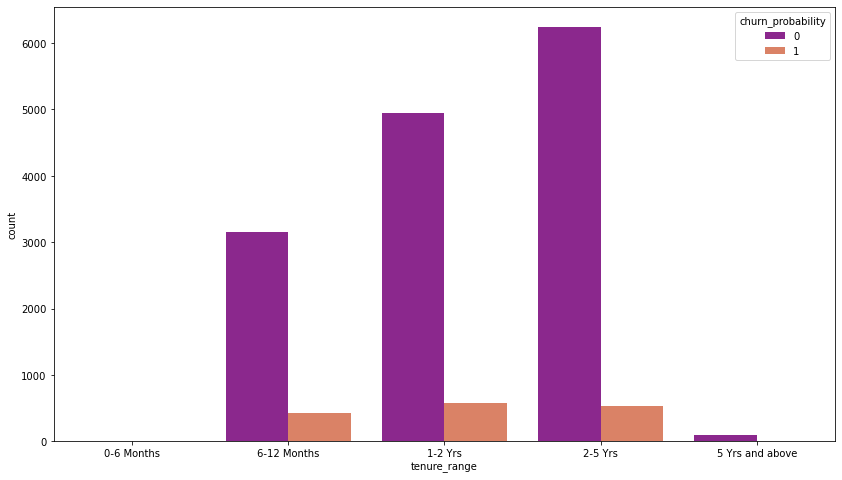

In [103]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn_probability',data = hv_df_telecom,palette=("plasma"))
plt.show()
hv_df_telecom = hv_df_telecom.drop(['tenure_range'], axis=1)

#### Bivariate Analysis

In [104]:
# Function to plots the features for bivariate analysis
def bivariate(data,col1,col2,col3):
    print(col1[:-2]," vs churn analysis")
    fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(24,8))
    sns.boxplot(y=data[col1],x=hv_df_telecom["churn_probability"], ax=axs[0])
    sns.boxplot(y=data[col2],x=hv_df_telecom["churn_probability"], ax=axs[1])
    sns.boxplot(y=data[col3],x=hv_df_telecom["churn_probability"], ax=axs[2])
    plt.show()

arpu  vs churn analysis


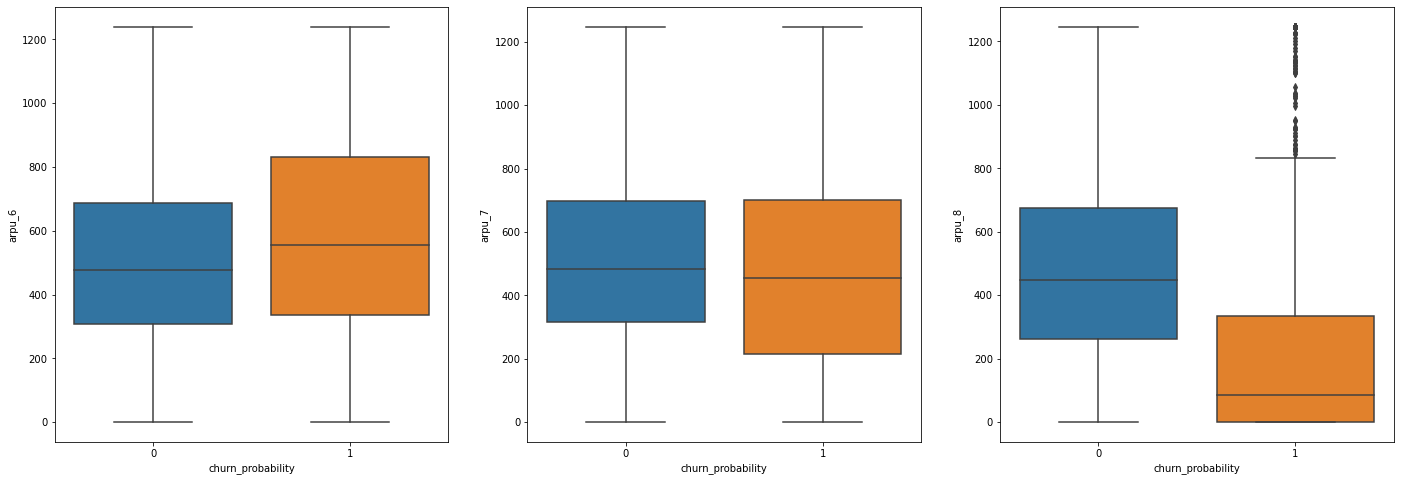

total_rech_num  vs churn analysis


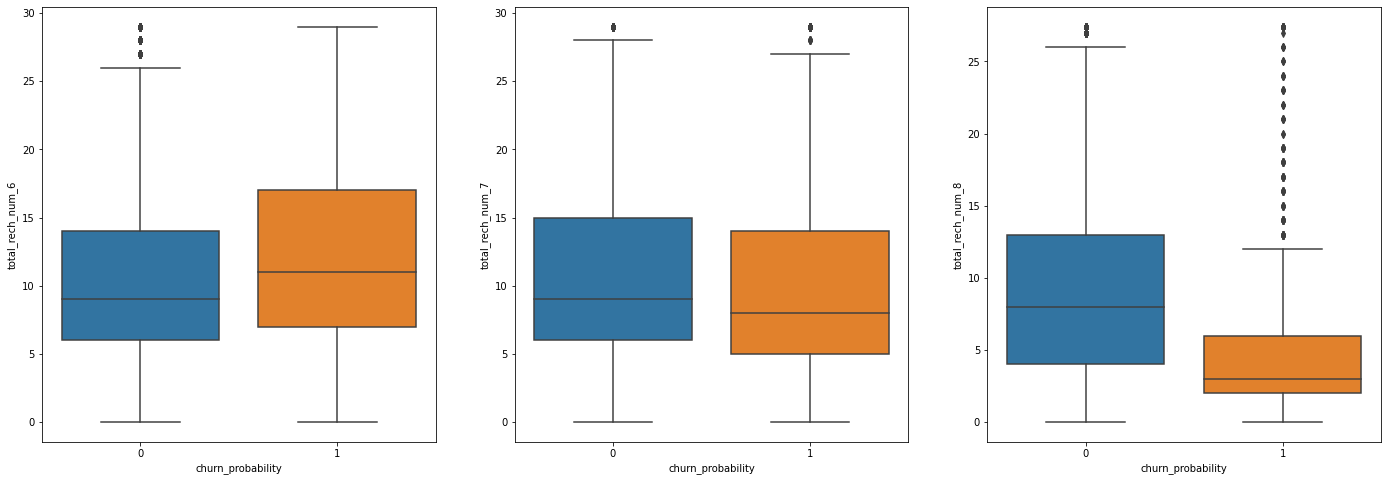

av_rech_amt_data  vs churn analysis


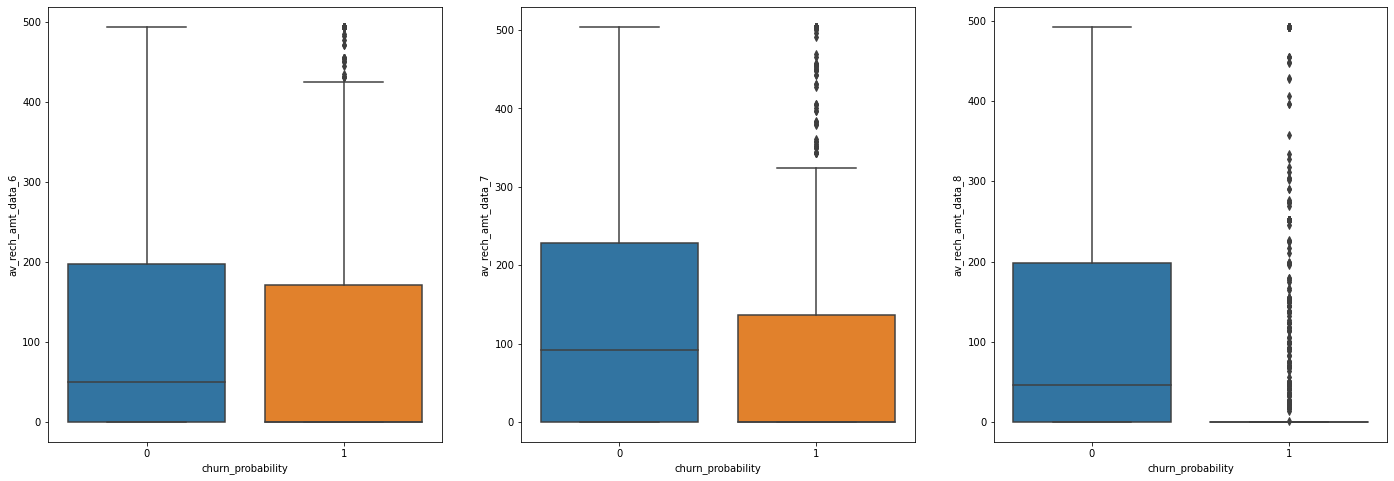

In [105]:
bivariate(hv_df_telecom,'arpu_6','arpu_7','arpu_8')
bivariate(hv_df_telecom,'total_rech_num_6','total_rech_num_7','total_rech_num_8')
bivariate(hv_df_telecom,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8')

*Analysing few columns in the high value customers against the churn (below)*<br>

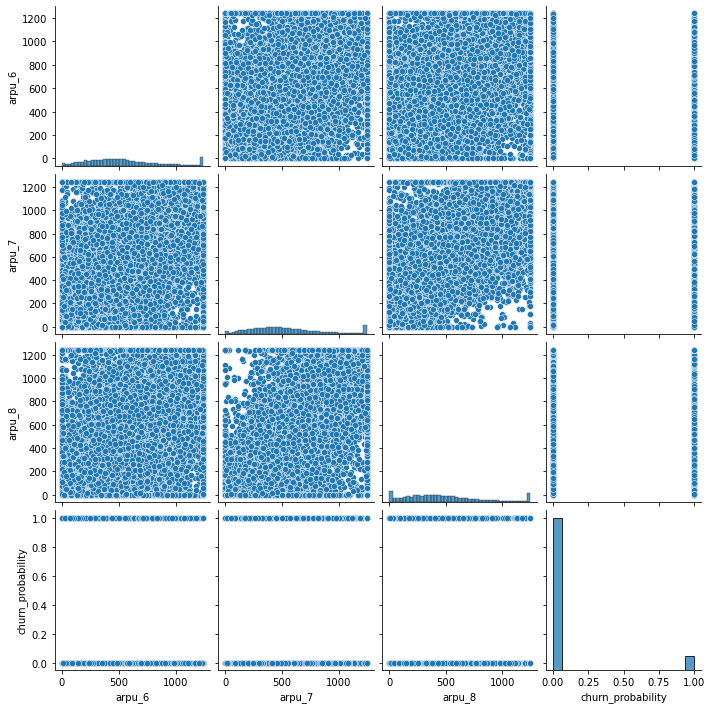

In [106]:
arpu = hv_df_telecom[['arpu_6','arpu_7', 'arpu_8', 'churn_probability']]
sns.pairplot(arpu)
plt.show()

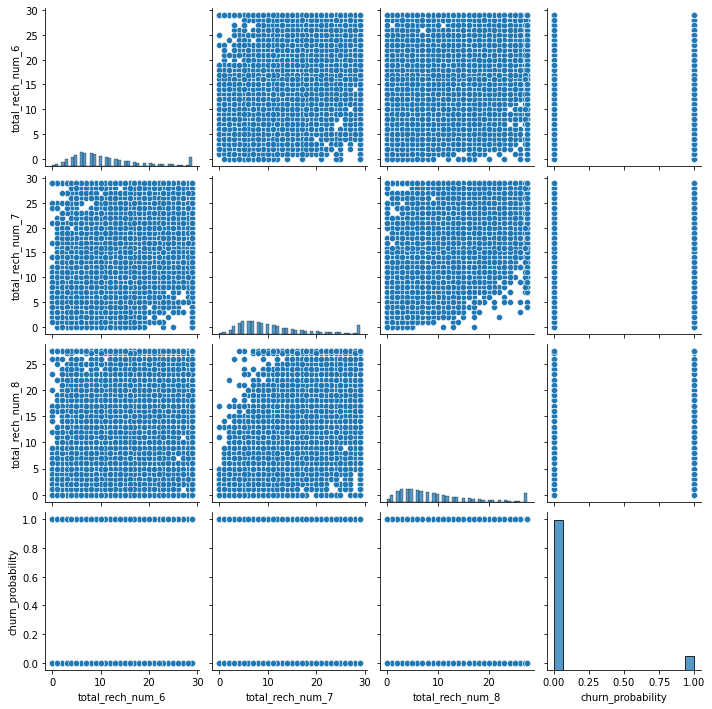

In [107]:
rech = hv_df_telecom[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8', 'churn_probability']]
sns.pairplot(rech)
plt.show()

*It is expected that the customers who do more recharge don't churn*<br>

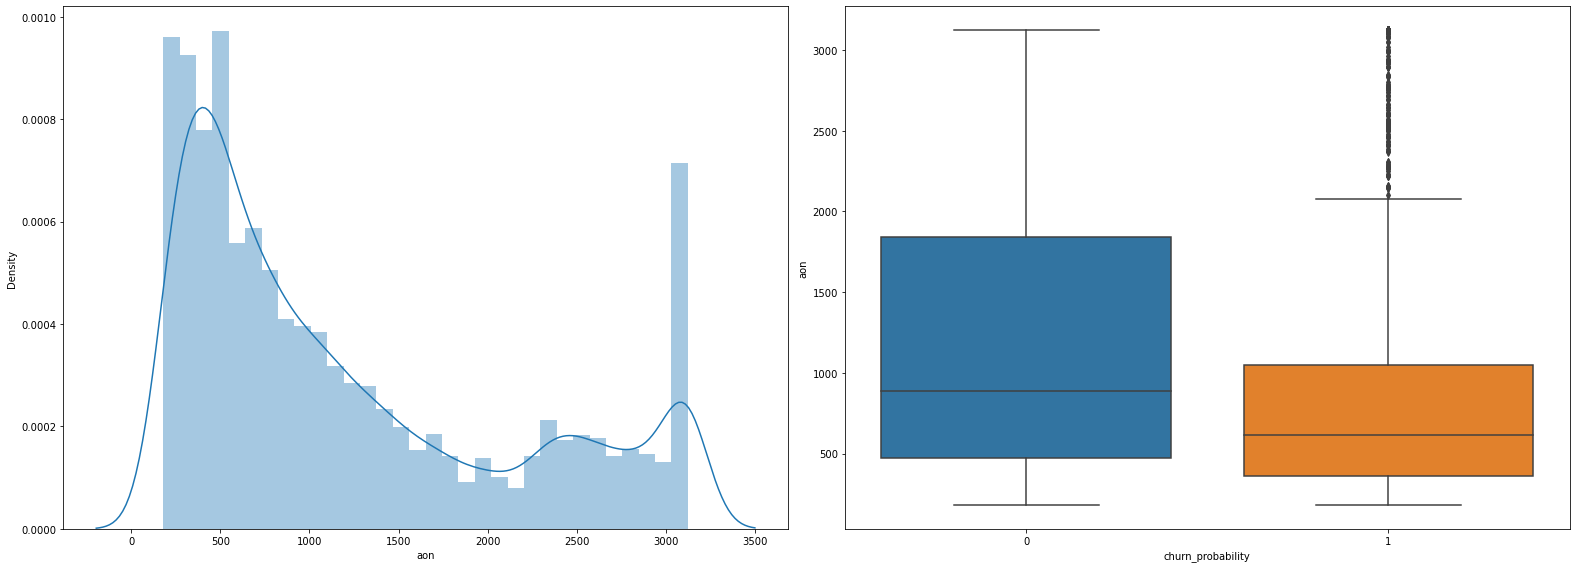

In [108]:
fig, ax = plt.subplots(ncols=2,figsize=(22,8))
sns.distplot(hv_df_telecom['aon'], ax=ax[0], hist=True, kde=True)
sns.boxplot(y=hv_df_telecom['aon'],x=hv_df_telecom["churn_probability"],ax=ax[1])
plt.tight_layout()
plt.show()

#### Churning customers are mostly new

In [109]:
hv_df_telecom.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_mon
4,4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.830,6.13,36.74,19.88,4.61,11.990,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.660,10.58,4.330,19.49,5.510,3.63,6.140,21.54,9.360,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647.0,0.0,0.00,0.00,0,21.566667
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.990,194.43,313.76,330.88,185.88,3.260,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,5.75,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,222.826,219.31,500.598,285.63,0.000,1.93,8.880,233.18,762.844,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,4.0,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,1.0,0.0,1.0,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,602.0,0.0,0.00,0.00,0,20.066667
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.

In [110]:
# # Check for the columns with only one unique value
# for i in hv_df_telecom.columns:
#     if hv_df_telecom[i].nunique() == 1:
#         hv_df_telecom.drop(i,axis=1,inplace = True)

In [111]:
hv_df_telecom.shape

(21013, 163)

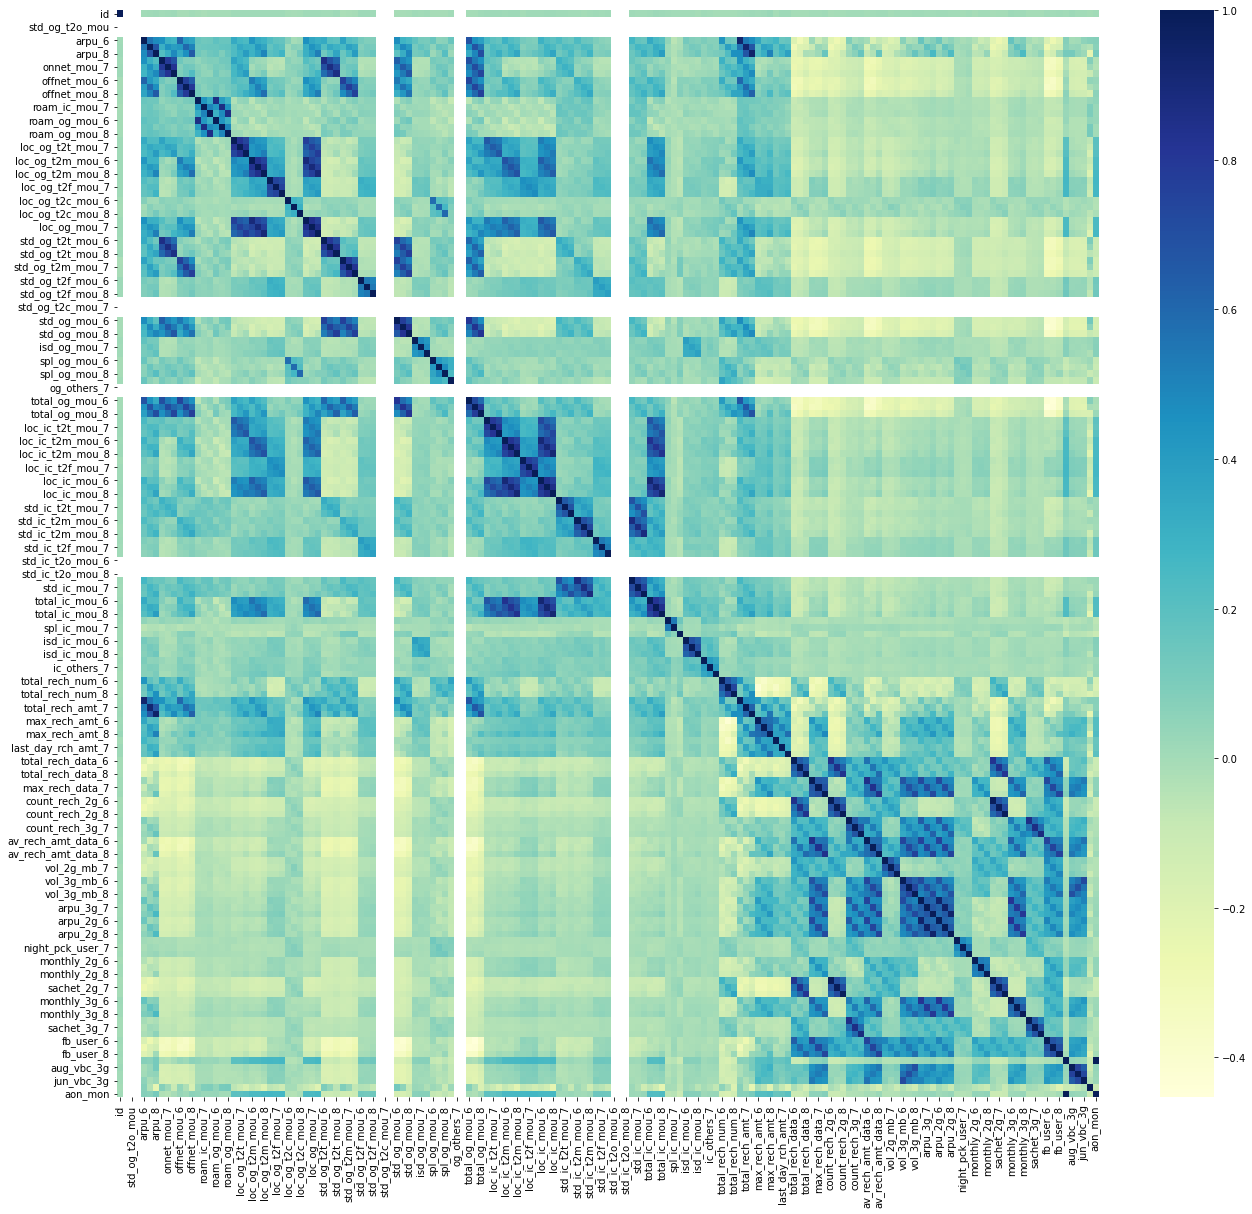

In [112]:
# Heat map
corr = hv_df_telecom.corr()
fig = plt.figure(figsize=(22,20))
sns.heatmap(corr,cmap="YlGnBu")
plt.show()

#### Finding and deleting correlated values with threshold >80%

In [113]:
#Step 1-Creating a square matrix with dimensions equal to the number of features.It will have the elements as the absolute value of correlation between the features.
cor_matrix = hv_df_telecom.corr().abs()
#Step 2- Selecting the Upper trigular matrix (Does not matter since the correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#Step -3 Dropping the column with high correlation > .80
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print('Below columns would be deleted \n');print(to_drop)
hv_df_telecom = hv_df_telecom.drop(to_drop, axis=1,errors='ignore')

Below columns would be deleted 

['onnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon_mon']


In [114]:
hv_df_telecom.shape

(21013, 111)

*Scaling data*<br>

In [115]:
# Divide into X and y.
y=pd.DataFrame(hv_df_telecom.churn_probability,index=hv_df_telecom.index) #'churn' now as a single column df with same index as hv_df
X=hv_df_telecom.drop('churn_probability',axis=1) # all features except 'churn'

X.describe()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_7,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,21013.00000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.00000,21013.0,21013.0,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,34994.28687,0.0,0.0,0.0,531.126112,531.017120,478.054328,228.677881,233.052316,343.174871,343.750661,301.062433,7.781772,4.753649,4.583043,60.901346,144.882785,4.308700,4.392976,4.019353,0.981205,1.135844,1.041309,149.390005,155.100274,0.550524,0.515580,0.454522,0.0,0.0,0.0,314.395428,326.516061,0.048776,0.040750,0.021428,4.314168,5.294156,4.891532,0.471012,0.0,0.0,50.160043,50.751225,133.034028,11.123619,11.416402,10.348623,8.272621,8.670066,7.639201,19.873993,20.60530,18.363831,1.103277,1.177826,1.02678,0.0,0.0,0.0,0.061762,0.018935,0.027204,3.706336,4.251618,3.916050,0.326032,0.425043,0.342779,11.276543,11.115643,9.404055,154.712416,156.111883,144.803693,86.828582,85.860610,79.38105,1.458954,1.660306,1.396897,72.343740,74.047399,67.208395,0.427830,0.458193,0.414029,99.38035,97.623580,78.661843,273.142079,294.968615,275.06338,53.154718,54.333566,48.868803,0.013182,0.013040,0.011422,0.174273,0.184457,0.153810,0.226669,0.51649,0.523771,0.476372,1194.185571,135.559216,141.224169,123.389091
std,20144.16597,0.0,0.0,0.0,306.451

In [116]:
# Scaling all the features in X to a range of 0 to 1 with MinMaxScaler
# all columns in X
cols = X.columns.values

# Initialize
scaler = MinMaxScaler()

# fit the scalar object
scaler.fit(X)

# Transform X and dataframe with scaled features
X = pd.DataFrame(scaler.transform(X),index=hv_df_telecom.index,columns=cols)

#### Modelling

In [120]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [121]:
# Variables for random_state  and test_size
rs = 42 #random_state 
ts = 0.3 #test_size

In [122]:
# selecting non-default logistic regression parameters for initializing
lr_parameters = {'class_weight':'balanced', 'n_jobs':-1, 'random_state':rs, 'solver':'liblinear'}
rf_parameters = {'n_jobs':-1, 'random_state':rs}

*Train Test Split*<br>

In [126]:
# divide data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

In [129]:
check_pct_churn1=(y_test.churn_probability.value_counts(1)*100).sort_values()
print(check_pct_churn1)

1     8.454949
0    91.545051
Name: churn_probability, dtype: float64


In [132]:
# Repeating split with stratify option
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=ts, random_state=rs, stratify=y.churn_probability)
check_pct_churn2=(y_test.churn_probability.value_counts(1)*100).sort_values()
print(check_pct_churn2)

1     8.280457
0    91.719543
Name: churn_probability, dtype: float64


In [133]:
print('X.shape - ',X.shape)
print('y.shape -', y.shape)
print('X_train.shape -',X_train.shape)
print('y_train.shape - ',y_train.shape)
print('X_test.shape -',X_test.shape)
print('y_test.shape - ',y_test.shape)

X.shape -  (21013, 110)
y.shape - (21013, 1)
X_train.shape - (14709, 110)
y_train.shape -  (14709, 1)
X_test.shape - (6304, 110)
y_test.shape -  (6304, 1)


In [134]:
# sorting each of the dataframes by index so that the rows match up correctly
X_train.sort_index(inplace=True)
y_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)
y_test.sort_index(inplace=True)

In [135]:
# taking a backup of the dataframes for X_train, y_train, X-test and y_test so that they can be reset after changes
X_train_backup=X_train
y_train_backup=y_train
X_test_backup=X_test
y_test_backup=y_test

In [136]:
#Function for printing model results

def model(title,model,model_pred):
    
    print(X_test.shape)
    
    # printing classification report
    i=max(0,26-int(len(title)/2))
    print(i*'-',title,i*'-')
    print('\n',classification_report(y_test, model_pred, target_names=['no churn','churn'],digits=2))
    
    # printing confusion matrix
    disp=plot_confusion_matrix(model,X_test,y_test,display_labels=['no churn','churn'],cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion Matrix')
    plt.grid(False)
    plt.show()
    nrows=X_train.shape[0] 
    ncols=X_train.shape[1]

    # calculating and printing other metrics
    Accuracy = round(metrics.accuracy_score(y_test, model_pred),3)
    Recall = round(metrics.recall_score(y_test, model_pred),3)
    Precision = round(metrics.precision_score(y_test, model_pred),3)
    F1 = round(metrics.f1_score(y_test, model_pred),3)
    AUC = round(metrics.roc_auc_score(y_test, model_pred),3)
    print(' Predicted labels:',Counter(model_pred))
    print('\n','Accuracy=',Accuracy,' Recall=',Recall,' AUC=',AUC)
        
    # storing results in Results dataframe
    result_row = [title,rs,ts,resample_method,nrows,ncols,Accuracy,Recall,Precision,F1,AUC]
    Results.loc[len(Results)] = result_row
    
    return

In [137]:
Results=pd.DataFrame(columns=['Model','Random State','Test Size','Resample Method','Training Rows','Features',
    'Test Accuracy','Test Recall','Test Precision','Test F1 Score','Test AUC'])

#### Comparing different Models

*Logistic Regression*<br>

(6304, 110)
----------------- Logistic Regression -----------------

               precision    recall  f1-score   support

    no churn       0.98      0.82      0.90      5782
       churn       0.30      0.82      0.44       522

    accuracy                           0.82      6304
   macro avg       0.64      0.82      0.67      6304
weighted avg       0.92      0.82      0.86      6304



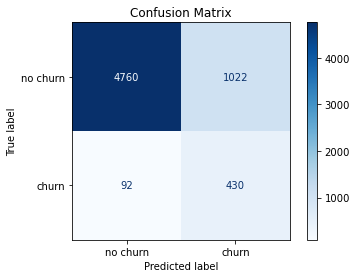

 Predicted labels: Counter({0: 4852, 1: 1452})

 Accuracy= 0.823  Recall= 0.824  AUC= 0.823


In [138]:
# Train Model
lr = LogisticRegression(**lr_parameters).fit(X_train, y_train)

# predicting on training set
lr_pred = lr.predict(X_test)

#Results
resample_method='None'
model(title='Logistic Regression',model=lr,model_pred=lr_pred)

*Random Forest*<br>

(6304, 110)
-------------------- Random Forest --------------------

               precision    recall  f1-score   support

    no churn       0.95      0.99      0.97      5782
       churn       0.74      0.40      0.52       522

    accuracy                           0.94      6304
   macro avg       0.85      0.69      0.74      6304
weighted avg       0.93      0.94      0.93      6304



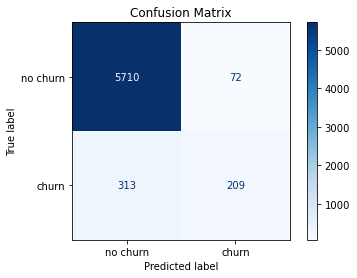

 Predicted labels: Counter({0: 6023, 1: 281})

 Accuracy= 0.939  Recall= 0.4  AUC= 0.694


In [139]:
#Train model
rf = RandomForestClassifier(**rf_parameters)
rf.fit(X_train, y_train)

# Predict 
rf_pred = rf.predict(X_test)

#Result
model(title='Random Forest',model=rf,model_pred=rf_pred)

#### As discussed earlier, given dataset is skewed, lets balance the dataset using SMOTE

In [140]:
# resetting X_train, y_train, X_test and y_test to full data sets after undersampling
X_train = X_train_backup
y_train = y_train_backup
X_test = X_test_backup
y_test = y_test_backup

print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(21013, 110) (21013, 1) (14709, 110) (14709, 1) (6304, 110) (6304, 1)


In [141]:
# SMOTE
smote = SMOTE(random_state=rs,n_jobs=-1) # instantiate
X_train, y_train = smote.fit_resample(X_train, y_train)

In [142]:
print(len(X_train),len(y_train))
counter=Counter(y_train)
print(counter)

26984 26984
Counter({'churn_probability': 1})


##### Its Balanced now. Let's retry the models

*Logistic regression again with SMOTE*<br>

(6304, 110)
-------- Logistic Regression SMOTE Base Model --------

               precision    recall  f1-score   support

    no churn       0.98      0.84      0.91      5782
       churn       0.32      0.82      0.46       522

    accuracy                           0.84      6304
   macro avg       0.65      0.83      0.68      6304
weighted avg       0.93      0.84      0.87      6304



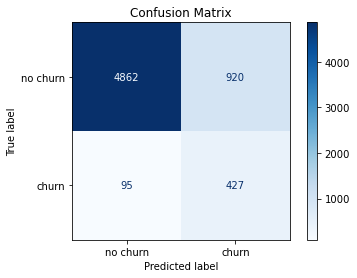

 Predicted labels: Counter({0: 4957, 1: 1347})

 Accuracy= 0.839  Recall= 0.818  AUC= 0.829


In [143]:
# Logistic regression again with the SMOTE dataset
lr_SMOTE = LogisticRegression(**lr_parameters).fit(X_train, y_train)
lr_SMOTE_pred = lr_SMOTE.predict(X_test)

# Results
resample_method='SMOTE'
model(title='Logistic Regression SMOTE Base Model',
              model=lr_SMOTE,model_pred=lr_SMOTE_pred)

*Accuracy has improved as compared to unbalanced dataset*<br>

*Random Forest with SMOTE*<br>

(6304, 110)
----------- Random Forest SMOTE Base Model -----------

               precision    recall  f1-score   support

    no churn       0.96      0.96      0.96      5782
       churn       0.58      0.59      0.58       522

    accuracy                           0.93      6304
   macro avg       0.77      0.77      0.77      6304
weighted avg       0.93      0.93      0.93      6304



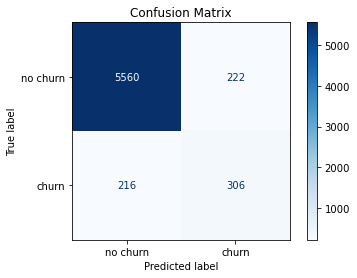

 Predicted labels: Counter({0: 5776, 1: 528})

 Accuracy= 0.931  Recall= 0.586  AUC= 0.774


In [144]:
# Training
rf_SMOTE = RandomForestClassifier(**rf_parameters).fit(X_train, y_train)

# Prediction
rf_SMOTE_pred = rf_SMOTE.predict(X_test)

# Results
resample_method='SMOTE'
model(title='Random Forest SMOTE Base Model',model=rf_SMOTE,model_pred=rf_SMOTE_pred)

*It seems SMOTE is a good choice here for dealing with class imbalane*<br>

#### Feature selection with RFE

In [145]:
def checkVIF(X):
    vif = pd.DataFrame()
   # X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [146]:
# RFE with top 15 features
lr_rfe = LogisticRegression(**lr_parameters)
rfe = RFE(lr_rfe, n_features_to_select=15)        
rfe = rfe.fit(X_train,y_train) 

In [147]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', False, 75),
 ('loc_og_t2o_mou', False, 95),
 ('std_og_t2o_mou', False, 93),
 ('loc_ic_t2o_mou', False, 92),
 ('arpu_6', False, 18),
 ('arpu_7', False, 3),
 ('arpu_8', False, 81),
 ('onnet_mou_6', False, 65),
 ('onnet_mou_7', False, 58),
 ('offnet_mou_6', False, 8),
 ('offnet_mou_7', False, 64),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 49),
 ('roam_ic_mou_7', False, 46),
 ('roam_ic_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 38),
 ('loc_og_t2m_mou_6', False, 9),
 ('loc_og_t2f_mou_6', False, 40),
 ('loc_og_t2f_mou_7', False, 55),
 ('loc_og_t2f_mou_8', False, 41),
 ('loc_og_t2c_mou_6', False, 35),
 ('loc_og_t2c_mou_7', False, 44),
 ('loc_og_t2c_mou_8', False, 42),
 ('std_og_t2m_mou_6', False, 10),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2f_mou_6', False, 53),
 ('std_og_t2f_mou_7', False, 63),
 ('std_og_t2f_mou_8', False, 23),
 ('std_og_t2c_mou_6', False, 94),
 ('std_og_t2c_mou_7', False, 86),
 ('std_og_t2c_mou_8', False, 96),
 ('std_og_mou_6', False, 12),
 ('std

In [148]:
# List of important features
cols = X_train.columns[rfe.support_]
cols

Index(['offnet_mou_8', 'roam_ic_mou_8', 'std_og_t2m_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'arpu_3g_8', 'monthly_2g_6', 'monthly_2g_7',
       'aug_vbc_3g'],
      dtype='object')

(6304, 15)
-------- Logistic Regression SMOTE RFE15 model --------

               precision    recall  f1-score   support

    no churn       0.98      0.81      0.89      5782
       churn       0.28      0.81      0.42       522

    accuracy                           0.81      6304
   macro avg       0.63      0.81      0.65      6304
weighted avg       0.92      0.81      0.85      6304



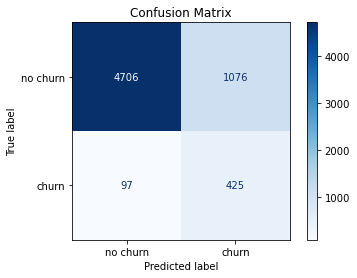

 Predicted labels: Counter({0: 4803, 1: 1501})

 Accuracy= 0.814  Recall= 0.814  AUC= 0.814


In [149]:
# Logistic regression model using the selected features
X_train=X_train[cols]
X_test=X_test[cols]
lr_RFE15 = LogisticRegression(**lr_parameters).fit(X_train, y_train)
lr_RFE15_pred = lr_RFE15.predict(X_test)
lr_RFE15_pred_proba = lr_RFE15.predict_proba(X_test)

resample_method='SMOTE'
model(title='Logistic Regression SMOTE RFE15 model',model=lr_RFE15,model_pred=lr_RFE15_pred)

In [150]:
checkVIF(X_train)

,Features,VIF
10,max_rech_data_8,4.47
0,offnet_mou_8,3.46
11,arpu_3g_8,3.30
7,total_rech_num_8,3.07
8,last_day_rch_amt_8,2.07
9,total_rech_data_8,1.97
2,std_og_t2m_mou_7,1.94
14,aug_vbc_3g,1.83
13,monthly_2g_7,1.64
4,std_ic_t2m_mou_8,1.61


###### VIF values look in range. No more reduction is needed

###### Run a random forest model using the RFE selected features

(6304, 15)
------------ Random Forest SMOTE RFE model ------------

               precision    recall  f1-score   support

    no churn       0.96      0.95      0.96      5782
       churn       0.51      0.61      0.55       522

    accuracy                           0.92      6304
   macro avg       0.74      0.78      0.76      6304
weighted avg       0.93      0.92      0.92      6304



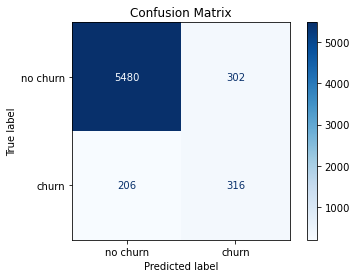

 Predicted labels: Counter({0: 5686, 1: 618})

 Accuracy= 0.919  Recall= 0.605  AUC= 0.777


In [151]:
# training 
rf_RFE15 = RandomForestClassifier(**rf_parameters).fit(X_train, y_train)

# predict on test set
rf_RFE15_pred = rf_RFE15.predict(X_test)
rf_RFE15_pred_proba = rf_RFE15.predict_proba(X_test)

# calling utility method to display model results
resample_method='SMOTE'
model(title='Random Forest SMOTE RFE model',model=rf_RFE15,model_pred=rf_RFE15_pred)

*The model with RFE selected features is better than the huge number of features earlier*<br>

In [172]:
print('AUC score =',"{:2.3f}".format(metrics.roc_auc_score(y_test.churn_probability, rf_RFE15_pred)))

AUC score = 0.777


### PCA

In [156]:
# Defining a utility function for calculating, printing and plotting model results
def model_result(title,model,model_pred,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    
    # printing classification report
    i=max(1,24-int(len(title)/2))
    print(i*'-',' ',title,' ',i*'-')
    print('\n',classification_report(y_test, model_pred, target_names=['no churn','churn'],digits=2))
    
    # printing confusion matrix
    disp=plot_confusion_matrix(model,X_test,y_test,display_labels=['no churn','churn'],cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion Matrix')
    plt.grid(False)
    plt.show()
    nrows=X_train.shape[0] 
    ncols=X_train.shape[1]

    # calculating and printing other metrics
    Accuracy = round(metrics.accuracy_score(y_test, model_pred),3)
    Recall = round(metrics.recall_score(y_test, model_pred),3)
    Precision = round(metrics.precision_score(y_test, model_pred),3)
    F1 = round(metrics.f1_score(y_test, model_pred),3)
    AUC = round(metrics.roc_auc_score(y_test, model_pred),3)
    print(' Predicted labels:',Counter(model_pred))
    print('\n','Accuracy=',Accuracy,' Recall=',Recall,' AUC=',AUC)
        
    # storing results in Results dataframe
    result_row = [title,rs,ts,resample_method,nrows,ncols,Accuracy,Recall,Precision,F1,AUC]
    Results.loc[len(Results)] = result_row
    
    return

In [157]:
# Restoring the dataset
X_train = X_train_backup
X_test = X_test_backup
y_train = y_train_backup
y_test = y_test_backup

In [158]:
#Correct class imbalance using SMOTE
smote = SMOTE(sampling_strategy=1.0,random_state=rs,n_jobs=-1,k_neighbors=5)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [159]:
# PCA model
pca = PCA(random_state=rs)
# Fit
pca.fit(X_train_smote)

PCA(random_state=42)

In [160]:
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

#### LogisticRegression

----   Logistic Regression base model - with PCA   ----

               precision    recall  f1-score   support

    no churn       0.98      0.84      0.91      5782
       churn       0.32      0.82      0.46       522

    accuracy                           0.84      6304
   macro avg       0.65      0.83      0.68      6304
weighted avg       0.93      0.84      0.87      6304



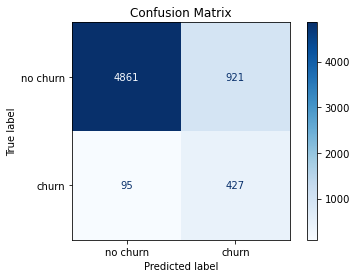

 Predicted labels: Counter({0: 4956, 1: 1348})

 Accuracy= 0.839  Recall= 0.818  AUC= 0.829


In [177]:
lr_pca = LogisticRegression(random_state=rs,solver='liblinear',n_jobs=-1)
lr_pca.fit(X_train_pca, y_train_smote)

# predictions
y_pred = lr_pca.predict(X_test_pca)

y_pred_df = pd.DataFrame(y_pred)

# Print model results
resample_method='SMOTE'
model_result(title='Logistic Regression base model - with PCA', 
              model=lr_pca, model_pred=y_pred,X_train=X_train_pca,X_test=X_test_pca,y_train=y_train_smote,y_test=y_test)

In [215]:
#Loading TestSet data and Handling missing values on important features on testdata


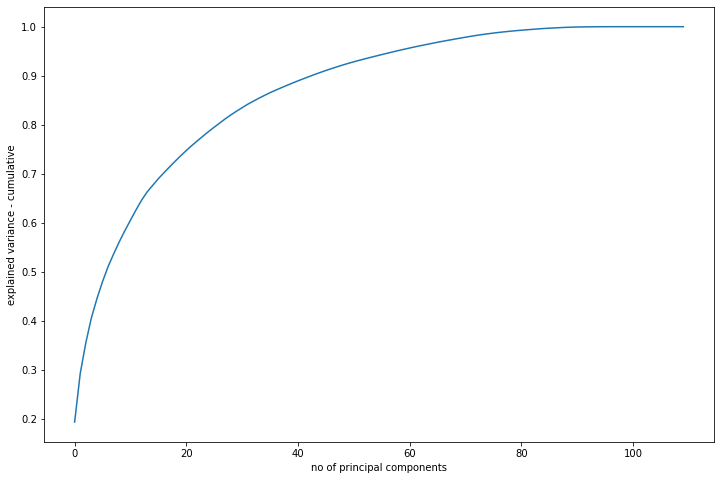

In [162]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [163]:
# Cumulative explained variance
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([19.38, 29.27, 35.52, 40.62, 44.56, 48.02, 51.09, 53.69, 56.14,
       58.4 , 60.54, 62.65, 64.63, 66.31, 67.66, 69.  , 70.21, 71.39,
       72.54, 73.66, 74.73, 75.75, 76.72, 77.66, 78.59, 79.47, 80.33,
       81.19, 81.99, 82.73, 83.45, 84.15, 84.77, 85.38, 85.96, 86.52,
       87.03, 87.52, 88.  , 88.47, 88.93, 89.37, 89.81, 90.24, 90.65,
       91.05, 91.43, 91.8 , 92.16, 92.5 , 92.82, 93.13, 93.43, 93.72,
       94.01, 94.29, 94.57, 94.85, 95.12, 95.38, 95.63, 95.88, 96.12,
       96.35, 96.58, 96.81, 97.03, 97.24, 97.45, 97.65, 97.84, 98.03,
       98.22, 98.39, 98.54, 98.68, 98.82, 98.95, 99.07, 99.18, 99.28,
       99.37, 99.46, 99.55, 99.63, 99.69, 99.75, 99.81, 99.86, 99.9 ,
       99.93, 99.95, 99.97, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99])

In [164]:
# PCA with 95% variance
pca_95 = PCA(0.95)

X_train_pca_95 = pca_95.fit_transform(X_train_smote)
print(X_train_pca_95.shape)

X_test_pca_95 = pca_95.transform(X_test)
print(X_test_pca_95.shape)

(26984, 59)
(6304, 59)


##### 58 Features are able to explain 95% of variance

In [165]:
# number of components
n_pcs= pca_95.components_.shape[0]

most_important = [np.abs(pca_95.components_[i]).argmax() for i in range(n_pcs)]

# initial features
initial_feature_names = X.columns.values

# most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# dictionary for names
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pca_components_df = pd.DataFrame(dic.items())
pca_components_df.head()

,0,1
0,PC0,fb_user_7
1,PC1,arpu_8
2,PC2,fb_user_8
3,PC3,arpu_3g_6
4,PC4,fb_user_6


#### Hyperparameter Tuning

In [166]:
# creating a StratifiedKFold object with 3 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = rs)

# regularization parameters
c_params = {'C':[0.1,1,5,10,12,14,15,18], 'class_weight':['balanced'],'penalty':['l1','l2','none']}
logistic = LogisticRegression()

# GridSearchCV()
model_logistic = GridSearchCV(estimator = logistic, param_grid = c_params, scoring= 'roc_auc',cv = folds,verbose = 1,
                        return_train_score=True) 

# fit the model
model_logistic.fit(X_train_pca_95, y_train_smote)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 5, 10, 12, 14, 15, 18],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'none']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [167]:
# cross validation results
cv_results = pd.DataFrame(model_logistic.cv_results_)
#cv_results

In [168]:
# best params and score
print('AUC:',model_logistic.best_score_)
print('Best params',model_logistic.best_params_)

AUC: 0.9090259026316341
Best params {'C': 5, 'class_weight': 'balanced', 'penalty': 'l2'}


-   Logistic Regression -PCA 95% , Hyperparameters - Tuned   -

               precision    recall  f1-score   support

    no churn       0.98      0.83      0.90      5782
       churn       0.31      0.81      0.45       522

    accuracy                           0.83      6304
   macro avg       0.64      0.82      0.67      6304
weighted avg       0.92      0.83      0.86      6304



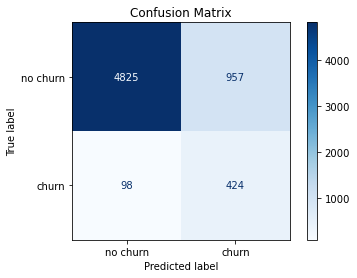

 Predicted labels: Counter({0: 4923, 1: 1381})

 Accuracy= 0.833  Recall= 0.812  AUC= 0.823


In [169]:
# logistic reg model with hyperparameter tuning
lr_pca = LogisticRegression(class_weight=model_logistic.best_params_["class_weight"],random_state=rs,penalty=model_logistic.best_params_["penalty"],n_jobs=-1)
lr_model_pca = lr_pca.fit(X_train_pca_95,y_train_smote)

# prediction
y_pred95 = lr_model_pca.predict(X_test_pca_95)

# prediction dataframe
df_y_pred = pd.DataFrame(y_pred95)

# calling utility function to display model results
resample_method='SMOTE'
model_result(title='Logistic Regression -PCA 95% , Hyperparameters - Tuned', 
              model=lr_model_pca,model_pred=y_pred95,X_train=X_test_pca_95,X_test=X_test_pca_95,y_train=y_train_smote,
              y_test=y_test)

#### Random Forest Model

-   Random Forest -PCA 95% , Hyperparameters - Default   -

               precision    recall  f1-score   support

    no churn       0.95      0.95      0.95      5782
       churn       0.45      0.43      0.44       522

    accuracy                           0.91      6304
   macro avg       0.70      0.69      0.70      6304
weighted avg       0.91      0.91      0.91      6304



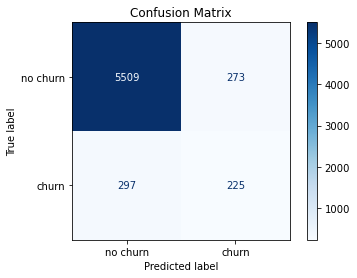

 Predicted labels: Counter({0: 5806, 1: 498})

 Accuracy= 0.91  Recall= 0.431  AUC= 0.692


In [173]:
# Random forest
model_rf = RandomForestClassifier(random_state = rs,n_jobs=-1)
model_rf.fit(X_train_pca_95, y_train_smote)

# prediction
y_pred95 = model_rf.predict(X_test_pca_95)

# Results
resample_method='SMOTE'
model_result(title='Random Forest -PCA 95% , Hyperparameters - Default', 
              model=model_rf,model_pred=y_pred95,X_train=X_test_pca_95,X_test=X_test_pca_95,y_train=y_train_smote,
              y_test=y_test)

#### Feature Importnce - Random Forest

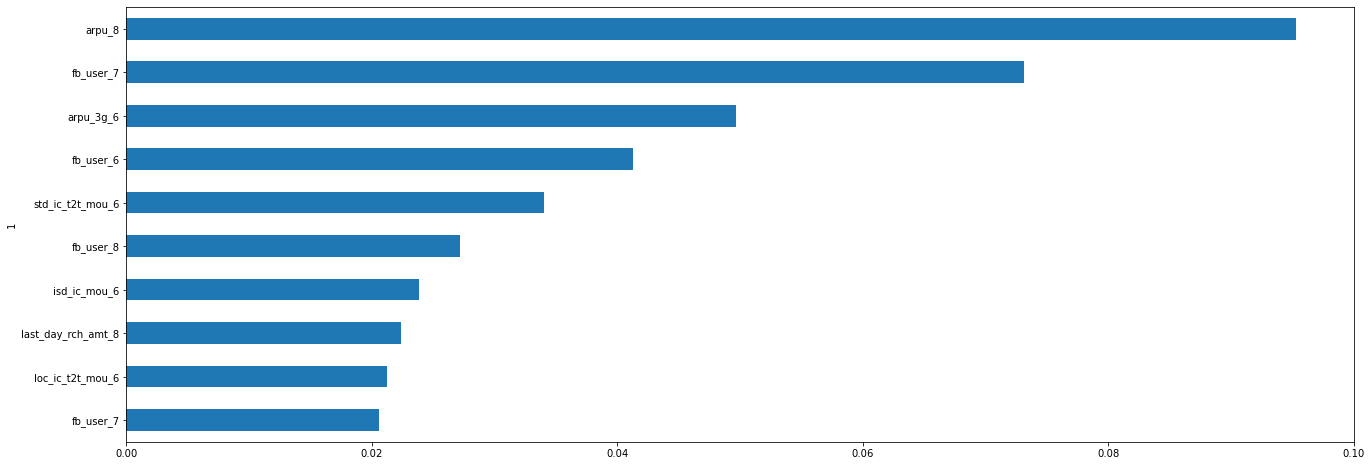

In [171]:
plt.figure(figsize =(22, 8))
importances = model_rf.feature_importances_
imp = pd.Series(importances,index=pca_components_df[1])
imp.sort_values()[-10:].plot(kind = 'barh')
plt.show()

#### The above chart suggests - Average revenue for the 8th month is an important predictor for churning the customer


### Overall Suggestion
*1. Average revenue per user seems to be most important feature in determining churn prediction*<br>
*2. Customers with less than 4 years of tenure are more likely to churn and business should focus on them with more offers*<br>
*3. STd outgoing calls also is a good indicator for churning customers*<br>
*4. The other main indicators of impending churn are a significant decrease in recharging, calls and data usage*<br>
*5. Based on the results (Recall= 0.809  AUC= 0.824) logistic regression model with PCA is better as compared to Random Forest*<br>
*6. As per Random forest model top 5 features are - arpu_8, fb_user_7,std_og_mou_6,std_ic_t2t_mou_7,fb_user_6*<br>
*7. As per RFE top 15 features are - 'arpu_7', 'onnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_8',
       'std_og_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'count_rech_3g_6', 'monthly_2g_7', 'sep_vbc_3g'*<br>

In [182]:
### EDA On Test Data

In [187]:
# Read the dataset

test_df = pd.read_csv("test.csv")
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [198]:
# Creating submission file

In [199]:
#For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [200]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na